In [1]:
import dd
import numpy as np
import matplotlib.pyplot as plt
from getsig import getsig
from ddremoveELMData import *
plt.style.use('helvet2')

Editions 5, 7(w/ HFS): Phase I

Editions 3, 8(w/ HFS): Phase II

Editions 4, 9(w/ HFS): Phase III

Edition 6 is ruined?

In [2]:
shotnr = 30554
used_ed = 9
ped = dd.shotfile('PED', shotnr, experiment='guimas', edition=used_ed)
t1 = ped('t1')
t2 = ped('t2')
nedata = ped('neData')
mskz = nedata.data!=0.0
rhos = nedata.area.data[0,mskz]
dens = nedata.data[mskz]
diagind = ped('DiagIndx')
nedpts = ped('neDPts')
indexesr = nedpts.data[nedpts.data!=0]
ped.close()

/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [3]:
if used_ed==4:
    nr_diags=3
elif used_ed==9:
    nr_diags=4 #Include HFS

indi = np.zeros(nr_diags).astype(int)
indf = np.zeros(nr_diags).astype(int)
#Initialize arrays
indf[0] = np.array(indexesr[0]-1).astype(int)

for i in range(1,nr_diags):
    indi[i] = np.sum(indexesr[0:i]).astype(int)
    indf[i] = np.sum(indexesr[0:i+1]).astype(int)-1

zorder = np.array([3,2,1,0])
labels = [r'$\mathrm{TS_{edge}}$', 'LIN', 'Ref. LFS', 'Ref. HFS']
clrs = ['r','g','b']

#### Get the average inter-ELM separatrix position

In [4]:
fpg = getsig(shotnr, 'FPG', 'Raus')
fpgmsk = ddremoveELMData(shotnr, fpg.time, preft=0.002, suft=0.004, elm_exper='guimas')
fpgind = (fpg.time>=t1.data)&(fpg.time<=t2.data)&fpgmsk
fpgavg = np.mean(fpg.data[fpgind])

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


#### Convert rho to Major Radius

In [5]:
import kk_abock
eq = kk_abock.kk()
eq.Open(30554, diag='FPP')
radius = eq.rhopol_to_Rz(3.0, rhos, 0.0)
rad = radius['R']
eq.Close()

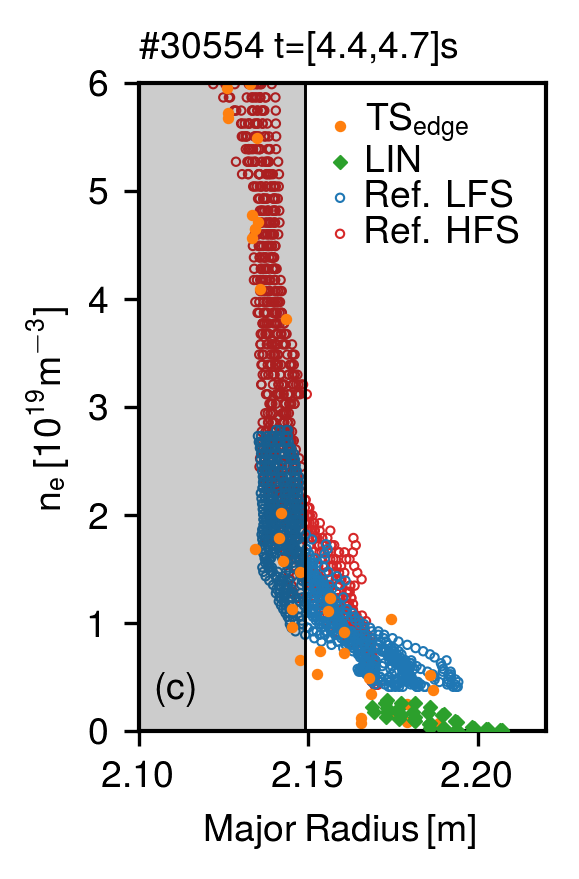

In [6]:
plt.figure(figsize=(2,3),dpi=300)
#plt.figure(figsize=(6,9))
#for a,b,zord,d,clr in zip(indi, indf, zorder,labels,clrs):
#    plt.scatter(rad[np.int(a):np.int(b)],dens[np.int(a):np.int(b)]*1e-19,s=6,zorder=zord,label=d,c=clr)

dotsize = 5
dotsizeref = 4

plt.scatter(rad[indi[0]:indf[0]], dens[indi[0]:indf[0]]*1e-19, s=dotsize, zorder=2, label=labels[0],
            #facecolors='none', 
            facecolors="C1", marker='o')

plt.scatter(rad[indi[1]:indf[1]], dens[indi[1]:indf[1]]*1e-19, s=dotsize, zorder=3, label=labels[1],
            facecolors='C2', marker='D')
            #facecolors='none', edgecolors="C{}".format(1), marker='D')

#Clean up ref
lrad = rad[indi[2]:indf[2]]
ldens = dens[indi[2]:indf[2]]
nms = lrad>2.135
plt.scatter(lrad[nms], ldens[nms]*1e-19, s=dotsizeref, zorder=1, label=labels[2],
            facecolors='none', edgecolors="C0", marker='o')

if used_ed == 9:
    hrad = rad[indi[3]:indf[3]]
    hdens = dens[indi[3]:indf[3]]
    hms = hrad>2.1#2.135
    plt.scatter(hrad[hms], hdens[hms]*1e-19, s=dotsizeref, zorder=0, label=labels[3],
                facecolors='none', edgecolors="C3", marker='o')

plt.axvline(fpgavg, color='k', lw=0.7)
plt.axvspan(2.1, fpgavg, color='k', alpha=0.2)

plt.xlabel(r'$\mathrm{Major\,Radius\,[m]}$')
plt.ylabel(r'$\mathrm{n_e\,[10^{19}m^{-3}]}$')
plt.ylim(0,6)
plt.xlim(2.10,2.22)
plt.title('\#30554 t=[%0.1f,%0.1f]s'%(t1.data,t2.data), loc='left', fontsize=9)
plt.legend(loc='upper right',borderpad=0.1,frameon=False,handletextpad=-0.3,labelspacing=0)
plt.xticks([2.10,2.15,2.20])
plt.text(2.105,0.3,'(c)', color='k')
plt.tight_layout()
#plt.savefig('Profiles/3_30554.png',dpi=300)
plt.show()

#### Pickle it for posterior comparisions

In [7]:
import pickle
refdata = {'r':lrad[nms], 'n':ldens[nms]*1e-19}
pickle.dump(refdata, open( "./Profiles/III_30554.pickle", "wb" ) )

In [8]:
#%%bash
#convert +append ./Profiles/1_30554.png ./Profiles/2_30554.png ./Profiles/3_30554.png ./Profiles/all_30554.png